In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shirelamozieg","key":"b6b1570ab3bd282dca8789ff48883f8e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d unsdsn/world-happiness


Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 37.9MB/s]


In [3]:
!unzip world-happiness.zip

Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [4]:
import pandas as pd

happiness = pd.read_csv('2019.csv')

print(happiness.head())
print("=====================================================")
# Check structure of dataset
print(happiness.info())
print("=====================================================")
# Summary statistics for numerical columns
print(happiness.describe())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [5]:
# Check for missing values
print("Missing values per column : ")
print(happiness.isnull().sum())


Missing values per column : 
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


The table indicates that there are no missing values. This means the dataset is **complete**, so there is no need to replace or remove any values.
Since all columns have 0 missing values, the data does not require any further preprocessing regarding missing values.

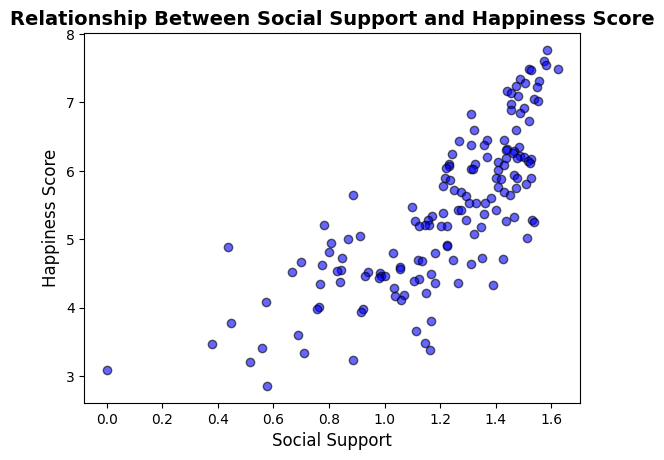

In [6]:
import matplotlib.pyplot as plt

plt.scatter(happiness['Social support'], happiness['Score'], color='blue', alpha=0.6, edgecolors='black')

plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Relationship Between Social Support and Happiness Score', fontsize=14, fontweight='bold')

plt.show()

<ipython-input-7-a0af8ae6b2fe>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(region_data['Country or region'], rotation=45, ha='right')


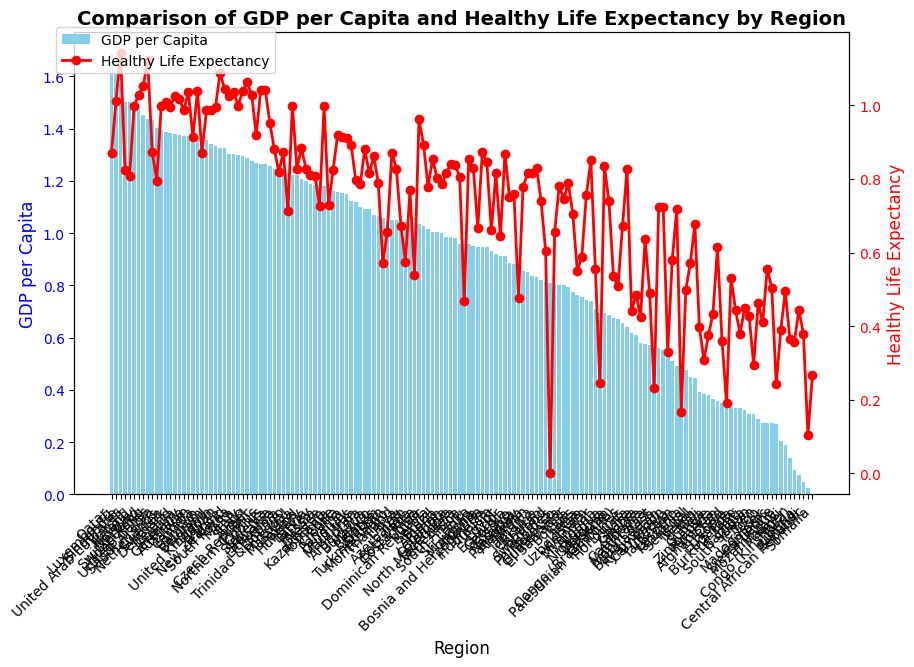

In [7]:
region_data = happiness.groupby('Country or region').agg({
    'GDP per capita': 'mean',
    'Healthy life expectancy': 'mean'
}).reset_index()

#Sort values for better visualization
region_data = region_data.sort_values(by='GDP per capita', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar plot for GDP per Capita
ax1.bar(region_data['Country or region'], region_data['GDP per capita'], color='skyblue', label='GDP per Capita')
ax1.set_xlabel("Region", fontsize=12)
ax1.set_ylabel("GDP per Capita", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(region_data['Country or region'], rotation=45, ha='right')

# Create a second y-axis for Healthy Life Expectancy
ax2 = ax1.twinx()
ax2.plot(region_data['Country or region'], region_data['Healthy life expectancy'], color='red', marker='o', linestyle='-', linewidth=2, label='Healthy Life Expectancy')
ax2.set_ylabel("Healthy Life Expectancy", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title("Comparison of GDP per Capita and Healthy Life Expectancy by Region", fontsize=14, fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()